conda install -c anaconda pymysql

conda install -c anaconda sqlalchemy

conda install -c anaconda seaborn

In [37]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
import pymysql as pymysql

In [3]:
connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

In [4]:

df = pd.read_sql('SELECT * FROM credit', con=connection)

C:\Users\Aldo\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [5]:
df.to_csv ( 'BancoUno.csv' , header = False , index = False )

In [6]:
credit=df

conda install -c conda-forge pandas-profiling


In [7]:
import pandas_profiling

In [8]:
pandas_profiling.ProfileReport(credit)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
credit=credit.drop_duplicates()

In [10]:
credit=credit.rename(columns=credit.iloc[0]).drop(credit.index[0])

In [11]:
credit.columns.values[23]="default_payment_next_month"

In [12]:

credit.head(100)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,90000,male,university,2,35,0,0,0,0,0,...,35565,30942,30835,3621,3597,1179,1112,1104,1143,not default
97,360000,male,graduate school,1,43,-1,-1,-1,-1,-1,...,6451,26370,9956,8339,3394,12902,27000,0,68978,not default
98,150000,male,graduate school,2,27,0,0,0,0,0,...,89775,87725,40788,4031,10006,3266,4040,1698,800,not default
99,50000,female,high school,1,22,0,0,0,0,0,...,13150,8866,7899,1411,1194,379,281,321,197,not default


In [13]:
credit.shape

(2396, 24)

In [14]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,...,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396
unique,62,2,4,4,52,9,10,10,9,8,...,2008,1983,1947,1146,1129,1040,1034,1038,970,2
top,50000,female,university,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,296,1384,1077,1330,138,1143,1239,1219,1303,1306,...,270,290,343,435,457,515,524,535,618,1877


In [15]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2397
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   2396 non-null   object
 1   SEX                         2396 non-null   object
 2   EDUCATION                   2396 non-null   object
 3   MARRIAGE                    2396 non-null   object
 4   AGE                         2396 non-null   object
 5   PAY_0                       2396 non-null   object
 6   PAY_2                       2396 non-null   object
 7   PAY_3                       2396 non-null   object
 8   PAY_4                       2396 non-null   object
 9   PAY_5                       2396 non-null   object
 10  PAY_6                       2396 non-null   object
 11  BILL_AMT1                   2396 non-null   object
 12  BILL_AMT2                   2396 non-null   object
 13  BILL_AMT3                   2396 non-null   obje

In [16]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [17]:
credit[["LIMIT_BAL","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]] = credit[["LIMIT_BAL","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].astype("int")

In [18]:

credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2397
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   2396 non-null   int32 
 1   SEX                         2396 non-null   object
 2   EDUCATION                   2396 non-null   object
 3   MARRIAGE                    2396 non-null   int32 
 4   AGE                         2396 non-null   int32 
 5   PAY_0                       2396 non-null   int32 
 6   PAY_2                       2396 non-null   int32 
 7   PAY_3                       2396 non-null   int32 
 8   PAY_4                       2396 non-null   int32 
 9   PAY_5                       2396 non-null   int32 
 10  PAY_6                       2396 non-null   int32 
 11  BILL_AMT1                   2396 non-null   int32 
 12  BILL_AMT2                   2396 non-null   int32 
 13  BILL_AMT3                   2396 non-null   int3

In [19]:
credit=pd.get_dummies(credit)

In [20]:
credit.dtypes

LIMIT_BAL                                 int32
MARRIAGE                                  int32
AGE                                       int32
PAY_0                                     int32
PAY_2                                     int32
PAY_3                                     int32
PAY_4                                     int32
PAY_5                                     int32
PAY_6                                     int32
BILL_AMT1                                 int32
BILL_AMT2                                 int32
BILL_AMT3                                 int32
BILL_AMT4                                 int32
BILL_AMT5                                 int32
BILL_AMT6                                 int32
PAY_AMT1                                  int32
PAY_AMT2                                  int32
PAY_AMT3                                  int32
PAY_AMT4                                  int32
PAY_AMT5                                  int32
PAY_AMT6                                

In [21]:
credit.head()

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default_payment_next_month_default,default_payment_next_month_not default
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,0,0,0,0,1,1,0
2,120000,2,26,-1,2,0,0,0,2,2682,...,0,2000,1,0,0,0,0,1,1,0
3,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,1,0,0,0,0,1,0,1
4,50000,1,37,0,0,0,0,0,0,46990,...,1069,1000,1,0,0,0,0,1,0,1
5,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,1,0,0,0,1,0,1


In [22]:
credit.tail()

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default_payment_next_month_default,default_payment_next_month_not default
2393,50000,1,32,2,3,2,2,2,2,39589,...,3600,0,0,1,0,1,0,0,1,0
2394,20000,2,49,0,0,2,0,-1,-1,8503,...,0,0,1,0,0,1,0,0,0,1
2395,130000,2,24,1,-2,-1,-1,-1,-1,-10,...,939,1013,1,0,0,0,0,1,0,1
2396,110000,1,27,0,0,0,0,0,0,61152,...,1911,1808,1,0,0,1,0,0,0,1
2397,200000,1,29,0,0,0,2,2,2,45982,...,12,5224,0,1,0,0,0,1,0,1


<center><h1 style="color:#FF0000">Graficas </h1><center>

In [36]:
%matplotlib inline
import matplotlib.pyplot as ptl


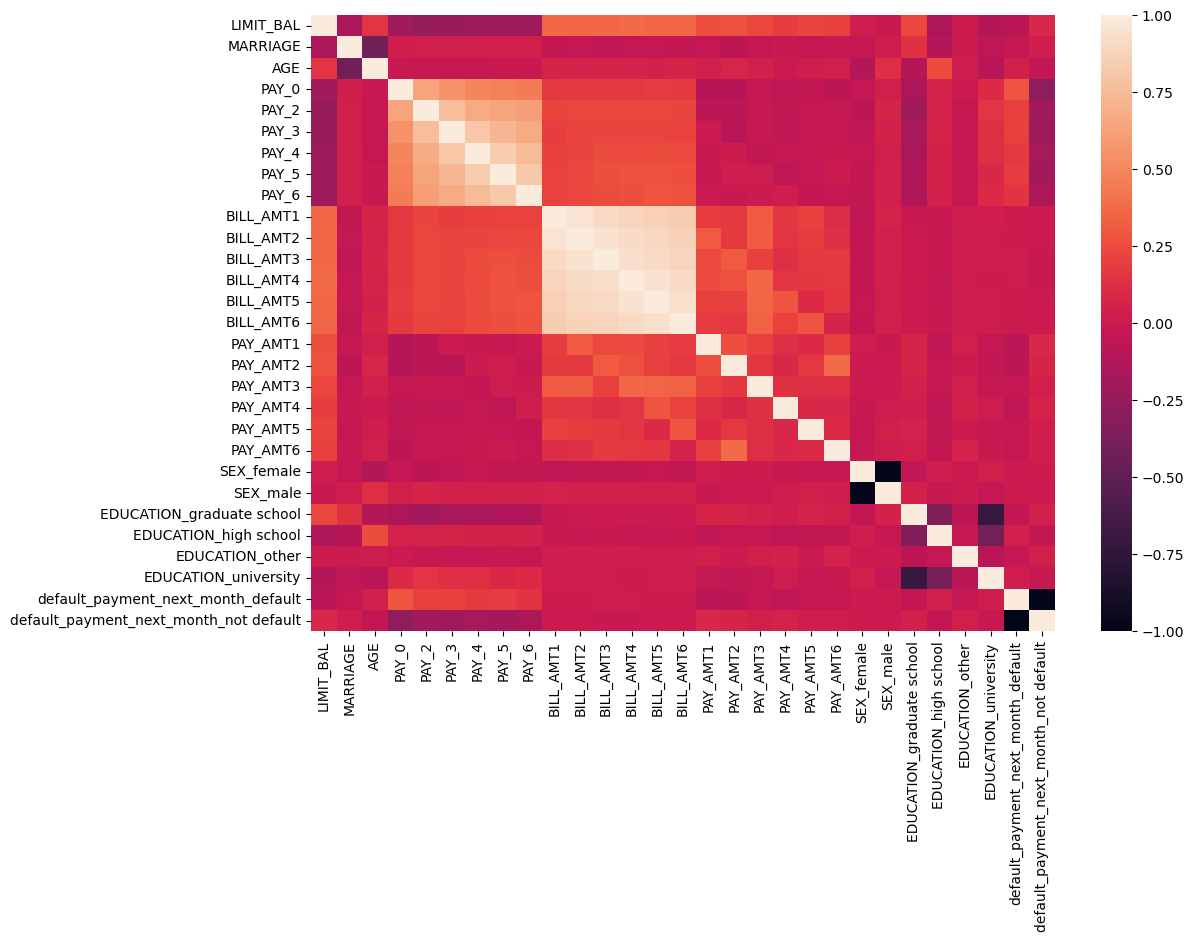

In [32]:
import seaborn as sns
matrix = credit.corr()
ptl.figure(figsize=(12,8))
_= sns.heatmap(matrix)

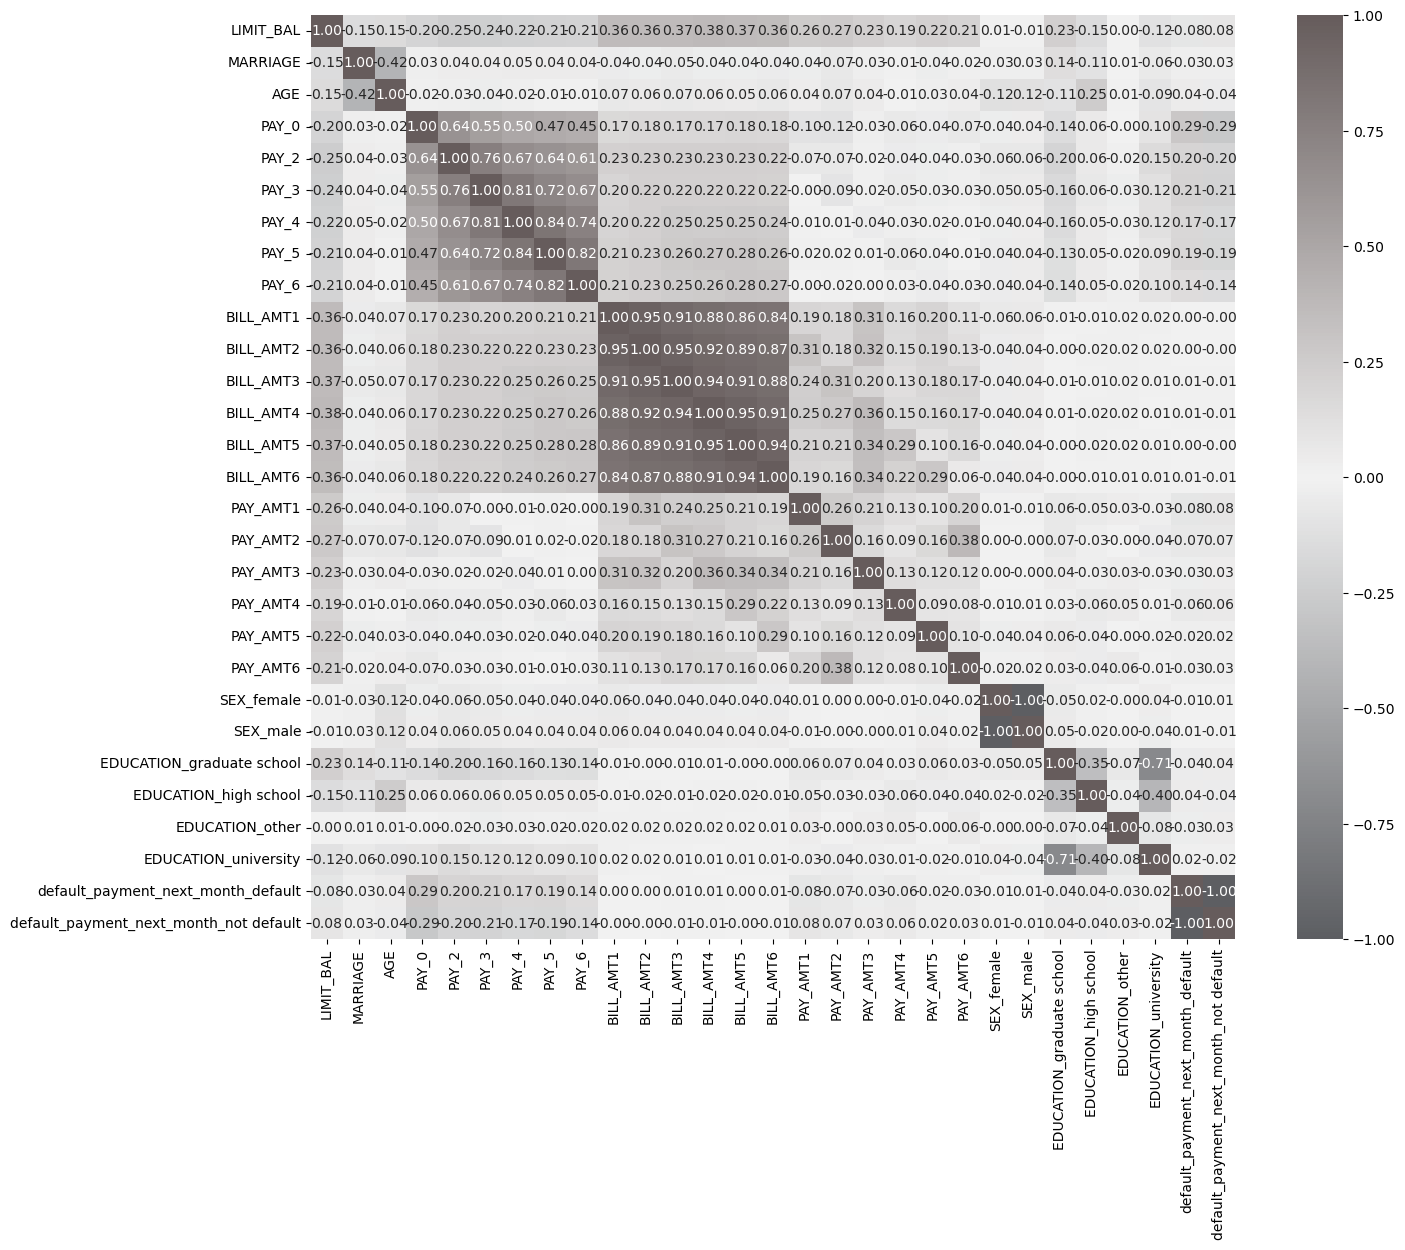

In [34]:
ptl.figure(figsize=(16,12))
cmap= sns.diverging_palette(250,15, s=5, l=40, n=9 , center="light", as_cmap=True)
_=sns.heatmap(matrix,center =0, annot=True,fmt=".2f", square= True , cmap=cmap)

In [35]:
credit1=credit.copy()

In [27]:
credit1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2397
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   LIMIT_BAL                               2396 non-null   int32
 1   MARRIAGE                                2396 non-null   int32
 2   AGE                                     2396 non-null   int32
 3   PAY_0                                   2396 non-null   int32
 4   PAY_2                                   2396 non-null   int32
 5   PAY_3                                   2396 non-null   int32
 6   PAY_4                                   2396 non-null   int32
 7   PAY_5                                   2396 non-null   int32
 8   PAY_6                                   2396 non-null   int32
 9   BILL_AMT1                               2396 non-null   int32
 10  BILL_AMT2                               2396 non-null   int32
 11  BILL_AMT3        

In [28]:
credit1=credit1.drop(["PAY_5","BILL_AMT2","BILL_AMT5","SEX_female","EDUCATION_university","default_payment_next_month_not default"], axis=1)

In [29]:
credit1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2397
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   LIMIT_BAL                           2396 non-null   int32
 1   MARRIAGE                            2396 non-null   int32
 2   AGE                                 2396 non-null   int32
 3   PAY_0                               2396 non-null   int32
 4   PAY_2                               2396 non-null   int32
 5   PAY_3                               2396 non-null   int32
 6   PAY_4                               2396 non-null   int32
 7   PAY_6                               2396 non-null   int32
 8   BILL_AMT1                           2396 non-null   int32
 9   BILL_AMT3                           2396 non-null   int32
 10  BILL_AMT4                           2396 non-null   int32
 11  BILL_AMT6                           2396 non-null   int32
 12  PAY_AM